In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from qualtrics import load_data
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Consistency LLMs Survey_July 24, 2025_10.25.csv')
df = df.iloc[2:]
df.rename(index={2: 'Human 1', 3: 'Human 2', 4: 'Human 3', 5: 'Ryan'}, inplace=True)
df.rename(index={i: f'Human {i-2}' for i in range(6, 13)}, inplace=True)
df

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
Human 1,2025-07-11 16:25:10,2025-07-11 16:46:29,0,100,1279,1,2025-07-11 16:46:30,R_1iGl89Q8MxXlIsN,anonymous,EN,...,6,4,2,1,1,5,5,5,3,3
Human 2,2025-07-11 22:15:12,2025-07-11 22:52:14,0,100,2222,1,2025-07-11 22:52:15,R_6NX9X5fS69edVqn,anonymous,EN,...,6,6,6,6,6,6,6,6,6,6
Human 3,2025-07-11 22:52:30,2025-07-11 23:27:06,0,100,2075,1,2025-07-11 23:27:07,R_5SLk6sYPjkUIm9H,anonymous,EN,...,5,5,5,5,5,5,5,5,5,5
Ryan,2025-07-22 22:30:21,2025-07-22 23:10:34,0,100,2412,1,2025-07-22 23:10:34,R_77p91pyGUAiMDeI,anonymous,EN,...,6,6,6,6,6,6,6,6,6,6
Human 4,2025-07-23 17:39:37,2025-07-23 18:14:33,0,100,2096,1,2025-07-23 18:14:34,R_59jqKEuNXNwc9JD,anonymous,EN,...,5,6,6,6,6,5,6,6,5,5
Human 5,2025-07-23 18:14:56,2025-07-23 18:47:12,0,100,1936,1,2025-07-23 18:47:13,R_32EeYNPvK42Xoid,anonymous,EN,...,6,6,6,6,6,6,6,6,6,6
Human 6,2025-07-23 18:47:37,2025-07-23 19:16:41,0,100,1743,1,2025-07-23 19:16:41,R_5IooZDomVqBcKMJ,anonymous,EN,...,1,2,2,3,1,1,1,2,2,1
Human 7,2025-07-23 19:17:01,2025-07-23 19:47:05,0,100,1804,1,2025-07-23 19:47:06,R_6BW8DbOl0TOOLQz,anonymous,EN,...,5,4,4,4,4,1,4,2,2,1
Human 8,2025-07-23 19:55:07,2025-07-23 20:13:05,0,100,1078,1,2025-07-23 20:13:06,R_6pGrpMwREH6h2gX,anonymous,EN,...,4,4,6,6,6,6,6,6,6,6
Human 9,2025-07-23 20:19:57,2025-07-23 20:59:13,0,100,2355,1,2025-07-23 20:59:14,R_10VkO1fHdUniYt0,anonymous,EN,...,6,6,6,6,6,6,5,6,6,5


In [3]:
df.keys()

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'Q_RecaptchaScore', 'Q_BallotBoxStuffing', 'Q472',
       'Q474_1', 'Q474_2', 'Q474_3', 'Q474_4', 'Q474_5', 'Q474_6', 'Q474_7',
       'Q474_8', 'Q474_9', 'Q474_10', 'Q474_11', 'QID2669', 'QID2670',
       'QID2671', 'QID2672', 'QID2673', 'QID2675', 'QID2676', 'QID2677',
       'QID2678', 'QID2679', 'QID2681', 'QID2682', 'QID2683', 'QID2684',
       'QID2685', 'QID2687', 'QID2688', 'QID2689', 'QID2690', 'QID2691',
       'QID2693', 'QID2694', 'QID2695', 'QID2696', 'QID2697', 'QID2699',
       'QID2700', 'QID2701', 'QID2702', 'QID2703', 'QID2705', 'QID2706',
       'QID2707', 'QID2708', 'QID2709', 'QID2711', 'QID2712', 'QID2713',
       'QID2714', 'QID2715', 'QID2717', 'QID2718', 'QID2719', 'QID2720',
       'QID2721', 'QID2723', 'QID2724', 'QID2725', 'QID2726', 'QID2727',
       'QID2729', 'QID2730', 'QID2731', 'QID

In [4]:
df['Q474_1']

Human 1     4
Human 2     4
Human 3     5
Ryan        3
Human 4     5
Human 5     5
Human 6     5
Human 7     5
Human 8     5
Human 9     5
Human 10    4
Name: Q474_1, dtype: object

In [5]:
# Stats on beginning questions (i.e. what is consistency to you)
q474_cols = [f'Q474_{i}' for i in range(1, 12)]
q474_numeric = df[q474_cols].apply(pd.to_numeric, errors='coerce')

means = q474_numeric.mean()
stds = q474_numeric.std()

print("Means:\n", means)
print("\nStandard Deviations:\n", stds)

Means:
 Q474_1     4.545455
Q474_2     4.363636
Q474_3     4.636364
Q474_4     4.545455
Q474_5     4.454545
Q474_6     4.272727
Q474_7     4.454545
Q474_8     2.000000
Q474_9     3.090909
Q474_10    3.363636
Q474_11    1.363636
dtype: float64

Standard Deviations:
 Q474_1     0.687552
Q474_2     0.809040
Q474_3     0.809040
Q474_4     0.522233
Q474_5     0.820200
Q474_6     1.009050
Q474_7     0.522233
Q474_8     1.095445
Q474_9     1.300350
Q474_10    1.026911
Q474_11    0.674200
dtype: float64


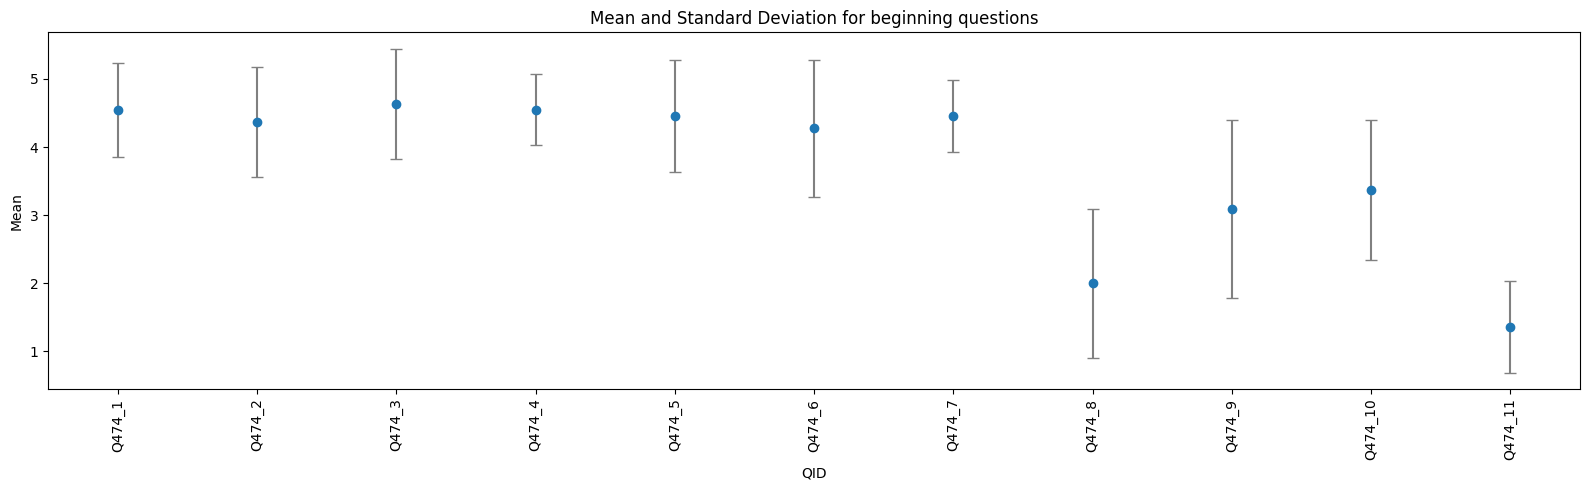

In [6]:
plt.figure(figsize=(16, 5))
plt.errorbar(means.index, means.values, yerr=stds.values, fmt='o', ecolor='gray', capsize=4)
plt.xticks(rotation=90)
plt.xlabel('QID')
plt.ylabel('Mean')
plt.title('Mean and Standard Deviation for beginning questions')
plt.tight_layout()
plt.show()

In [7]:
question_list = ['QID2669', 'QID2670', 'QID2671', 'QID2672',
       'QID2673', 'QID2675', 'QID2676', 'QID2677', 'QID2678', 'QID2679',
       'QID2681', 'QID2682', 'QID2683', 'QID2684', 'QID2685', 'QID2687',
       'QID2688', 'QID2689', 'QID2690', 'QID2691', 'QID2693', 'QID2694',
       'QID2695', 'QID2696', 'QID2697', 'QID2699', 'QID2700', 'QID2701',
       'QID2702', 'QID2703', 'QID2705', 'QID2706', 'QID2707', 'QID2708',
       'QID2709', 'QID2711', 'QID2712', 'QID2713', 'QID2714', 'QID2715',
       'QID2717', 'QID2718', 'QID2719', 'QID2720', 'QID2721', 'QID2723',
       'QID2724', 'QID2725', 'QID2726', 'QID2727', 'QID2729', 'QID2730',
       'QID2731', 'QID2732', 'QID2733', 'QID2735', 'QID2736', 'QID2737',
       'QID2738', 'QID2739', 'QID2741', 'QID2742', 'QID2743', 'QID2744',
       'QID2745', 'QID2747', 'QID2748', 'QID2749', 'QID2750', 'QID2751',
       'QID2753', 'QID2754', 'QID2755', 'QID2756', 'QID2757']

In [8]:
question_numeric = df[question_list].apply(pd.to_numeric, errors='coerce')
question_numeric = question_numeric / 6


question_means = question_numeric.mean()
question_stds = question_numeric.std()

print("Means:\n", question_means)
print("\nStandard Deviations:\n", question_stds)

Means:
 QID2669    0.742424
QID2670    0.787879
QID2671    0.727273
QID2672    0.787879
QID2673    0.712121
             ...   
QID2753    0.772727
QID2754    0.818182
QID2755    0.818182
QID2756    0.787879
QID2757    0.727273
Length: 75, dtype: float64

Standard Deviations:
 QID2669    0.272475
QID2670    0.150756
QID2671    0.238895
QID2672    0.248226
QID2673    0.224733
             ...   
QID2753    0.318614
QID2754    0.252262
QID2755    0.263044
QID2756    0.269680
QID2757    0.318614
Length: 75, dtype: float64


In [9]:
question_numeric

,QID2669,QID2670,QID2671,QID2672,QID2673,QID2675,QID2676,QID2677,QID2678,QID2679,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
Human 1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,...,1.000000,0.666667,0.333333,0.166667,0.166667,0.833333,0.833333,0.833333,0.500000,0.500000
Human 2,0.833333,0.833333,0.833333,0.833333,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Human 3,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,...,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333
Ryan,0.333333,0.500000,0.500000,0.500000,0.500000,0.833333,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Human 4,1.000000,0.833333,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.833333,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,0.833333,0.833333
Human 5,0.333333,0.833333,0.333333,0.333333,0.333333,0.833333,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Human 6,0.833333,0.833333,0.666667,1.000000,0.500000,0.333333,0.833333,0.833333,1.000000,1.000000,...,0.166667,0.333333,0.333333,0.500000,0.166667,0.166667,0.166667,0.333333,0.333333,0.166667
Human 7,0.500000,0.666667,0.500000,0.666667,0.666667,0.833333,0.833333,0.500000,0.833333,1.000000,...,0.833333,0.666667,0.666667,0.666667,0.666667,0.166667,0.666667,0.333333,0.333333,0.166667
Human 8,1.000000,0.666667,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333,1.000000,1.000000,...,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Human 9,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,0.833333


In [10]:
binary_table = (question_numeric > 0.5).astype(int)
binary_table.head()

,QID2669,QID2670,QID2671,QID2672,QID2673,QID2675,QID2676,QID2677,QID2678,QID2679,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
Human 1,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,0,0
Human 2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Human 3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Ryan,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Human 4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [11]:
row2 = question_numeric.iloc[0]
row3 = question_numeric.iloc[1]
row4 = question_numeric.iloc[2]
method = 'pearson'  # 'pearson', 'spearman', 'kendall'

print("Correlation between 2nd and 3rd row:", row2.corr(row3, method=method))
print("Correlation between 2nd and 4th row:", row2.corr(row4, method=method))
print("Correlation between 3rd and 4th row:", row3.corr(row4, method=method))

Correlation between 2nd and 3rd row: 0.2699023898705855
Correlation between 2nd and 4th row: -0.21131712606361172
Correlation between 3rd and 4th row: -0.15792647517411332


In [12]:
row2 = binary_table.iloc[0]
row3 = binary_table.iloc[1]
row4 = binary_table.iloc[2]
method = 'pearson'  # 'pearson', 'spearman', 'kendall'

print("Correlation between 2nd and 3rd row:", row2.corr(row3, method=method))
print("Correlation between 2nd and 4th row:", row2.corr(row4, method=method))
print("Correlation between 3rd and 4th row:", row3.corr(row4, method=method))

Correlation between 2nd and 3rd row: 0.24265265067645314
Correlation between 2nd and 4th row: -0.05569077228639921
Correlation between 3rd and 4th row: -0.013513513513513506


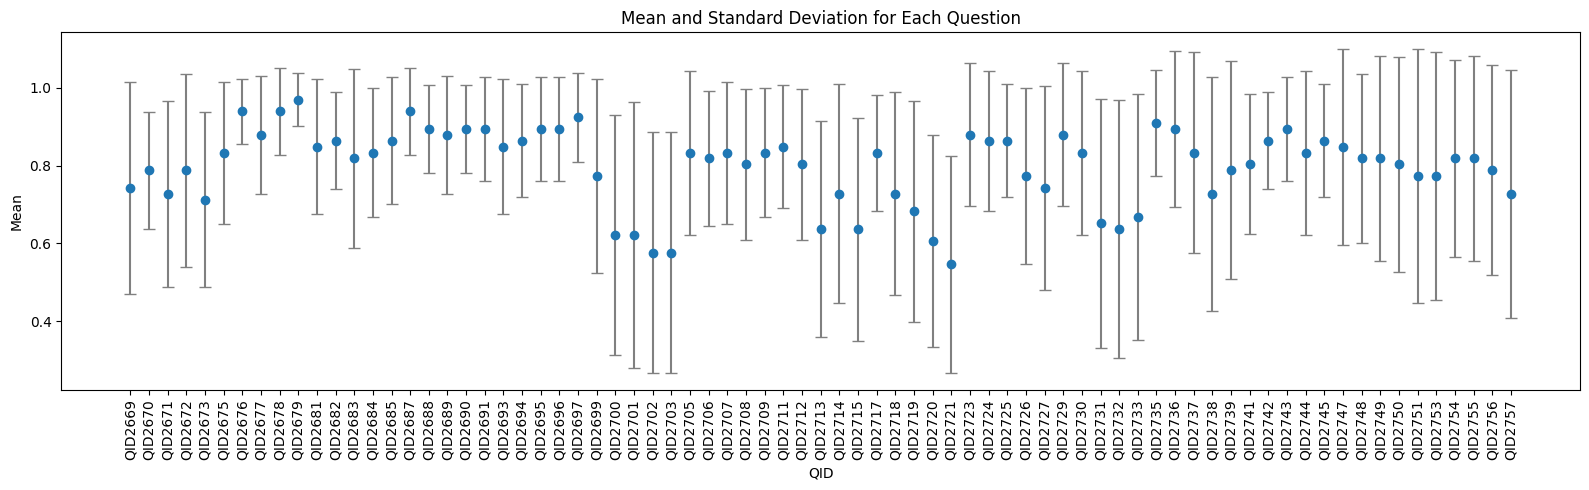

In [13]:
plt.figure(figsize=(16, 5))
plt.errorbar(question_means.index, question_means.values, yerr=question_stds.values, fmt='o', ecolor='gray', capsize=4)
plt.xticks(rotation=90)
plt.xlabel('QID')
plt.ylabel('Mean')
plt.title('Mean and Standard Deviation for Each Question')
plt.tight_layout()
plt.show()

In [14]:
# Group question_means and question_stds in sets of 5
group_size = 5
num_groups = int(np.ceil(len(question_means) / group_size))

grouped_means = []
grouped_stds = []

for i in range(num_groups):
    start = i * group_size
    end = start + group_size
    group_mean = question_means.iloc[start:end].mean()
    # Propagate error: std of the mean = sqrt(sum(std_i^2))/n
    group_std = np.sqrt((question_stds.iloc[start:end] ** 2).sum()) / (end - start)
    grouped_means.append(group_mean)
    grouped_stds.append(group_std)

print("Grouped Means:", grouped_means)
print("Grouped Standard Deviations:", grouped_stds)

Grouped Means: [0.7515151515151516, 0.9121212121212123, 0.8454545454545453, 0.9, 0.8848484848484848, 0.6333333333333333, 0.8242424242424242, 0.7303030303030302, 0.6787878787878787, 0.8242424242424242, 0.7333333333333332, 0.8303030303030303, 0.8515151515151516, 0.8121212121212121, 0.7848484848484849]
Grouped Standard Deviations: [0.10318170693715359, 0.05667557862184745, 0.07823817559997243, 0.056138357221378964, 0.06356417261637283, 0.13677379393389186, 0.0833636308559971, 0.10972877489703439, 0.11361818036340358, 0.09112096522222701, 0.12504544628399564, 0.10852547064066471, 0.07261354744623949, 0.12060453783110545, 0.12784144219866397]


In [15]:
models = ['chatting_gemma', 'chatting_mistral', 'chatting_llama', 'chatting_llama_ppo', 'chatting_llama_sft_ppo',
          'education_gemma', 'education_mistral', 'education_llama', 'education_llama_ppo', 'education_llama_sft_ppo',
          'therapy_gemma', 'therapy_mistral', 'therapy_llama', 'therapy_llama_ppo', 'therapy_llama_sft_ppo']

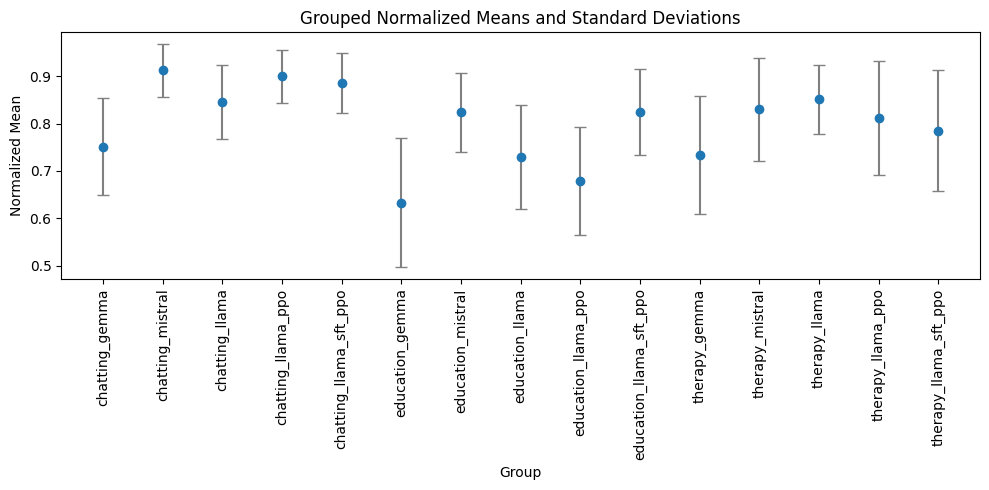

In [16]:
plt.figure(figsize=(10, 5))
x = np.arange(len(grouped_means))
plt.errorbar(x, grouped_means, yerr=grouped_stds, fmt='o', ecolor='gray', capsize=4)
plt.xticks(x, models, rotation=90)
plt.xlabel('Group')
plt.ylabel('Normalized Mean')
plt.title('Grouped Normalized Means and Standard Deviations')
plt.tight_layout()
plt.show()

In [17]:
with open('qualtrics_selected_indices.json', 'r') as f:
    indices = json.load(f)

print(indices)

{'chatting_gemma': {'files': ['/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_10_89.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_20_89.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_40_89.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_60_89.json'], 'indices': [137], 'conv_index': 7, 'scenario': 'Chatting'}, 'chatting_mistral': {'files': ['/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_10_727.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_20_727.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_40_727.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_60_727.json'], 'indices': [19], 'conv_index': 1, 'scenario': 'Chatti

In [18]:
base_path = Path("/nfs/kun2/users/ryan_cheng/consistency_LLMs")

In [19]:
chatting_gemma, chatting_gemma_files = load_data(base_path, "Chatting Nonfinetuned", "gemma")
chatting_mistral, chatting_mistral_files = load_data(base_path, "Chatting Nonfinetuned", "mistral")
chatting_llama, chatting_llama_files = load_data(base_path, "Chatting Nonfinetuned", "Llama-3.1-8B-Instruct")
chatting_llama_ppo, chatting_llama_ppo_files = load_data(base_path, "Chatting Finetuned", "llama-8b-ppo-mid-lr")
chatting_llama_sftppo, chatting_llama_sftppo_files = load_data(base_path, "Chatting Finetuned", "llama-8b-sft-ppo")

education_gemma, education_gemma_files = load_data(base_path, "Education Nonfinetuned", "gemma")
education_mistral, education_mistral_files = load_data(base_path, "Education Nonfinetuned", "mistral")
education_llama, education_llama_files = load_data(base_path, "Education Nonfinetuned", "Llama-3.1-8B-Instruct")
education_ppo_high_lr, education_ppo_high_lr_files = load_data(base_path, "Education Finetuned", "ppo_high_lr_Llama-3.1-8B")
education_ppo_sft_new_lr, education_ppo_sft_new_lr_files = load_data(base_path, "Education Finetuned", "ppo_sft_Llama")

therapy_gemma, therapy_gemma_files = load_data(base_path, "Therapy Nonfinetuned", "gemma")
therapy_mistral, therapy_mistral_files = load_data(base_path, "Therapy Nonfinetuned", "mistral")
therapy_llama, therapy_llama_files = load_data(base_path, "Therapy Nonfinetuned", "Llama-3.1-8B-Instruct")
therapy_ppo_llama, therapy_ppo_llama_files = load_data(base_path, "Therapy Finetuned", "ppo_Llama-3.1-8B")
therapy_ppo_sft_new_lr_llama, therapy_ppo_sft_new_lr_llama_files = load_data(base_path, "Therapy Finetuned", "ppo_sft_new_lr_Llama-3.1-8B-Instruct")

Loaded 100 records from gemma-2-2b-it_0_10_89.json
Loaded 100 records from gemma-2-2b-it_0_20_89.json


Loaded 100 records from gemma-2-2b-it_0_40_89.json
Loaded 100 records from gemma-2-2b-it_0_60_89.json
Loaded 100 records from mistral-instruct_0_10_727.json
Loaded 100 records from mistral-instruct_0_20_727.json
Loaded 100 records from mistral-instruct_0_40_727.json
Loaded 100 records from mistral-instruct_0_60_727.json
Loaded 400 records from Llama-3.1-8B-Instruct_0_623.json
Loaded 10 records from llama-8b-ppo-mid-lr_0_10_235.json
Loaded 10 records from llama-8b-ppo-mid-lr_0_20_235.json
Loaded 10 records from llama-8b-ppo-mid-lr_0_40_235.json
Loaded 10 records from llama-8b-ppo-mid-lr_0_60_235.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_10_56.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_20_56.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_40_56.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_60_56.json
Loaded 400 records from gemma-2-2b-it_0_852.json
Loaded 275 records from mistral-instruct_0_323.json
Loaded 62 records from mistral-instruct_0_615.json
L

In [20]:
all_runs = [
    chatting_gemma,
    chatting_mistral,
    chatting_llama,
    chatting_llama_ppo,
    chatting_llama_sftppo,
    education_gemma,
    education_mistral,
    education_llama,
    education_ppo_high_lr,
    education_ppo_sft_new_lr,
    therapy_gemma,
    therapy_mistral,
    therapy_llama,
    therapy_ppo_llama,
    therapy_ppo_sft_new_lr_llama
]

In [21]:
from utils import extract_list

INFO 07-25 00:29:45 [__init__.py:239] Automatically detected platform cuda.


In [ ]:
chatting_convs = []
education_convs = []
therapy_convs = []

for i, data in enumerate(indices.values()):
    index = data['indices'][0]
    if data['scenario'] == "Chatting":
        conv_index = data['conv_index']
    else:
        conv_index = (data['conv_index']) // 2 # always 2nd agent
    conv = all_runs[i][index]
    if data['scenario'] == "Chatting":
        chatting_convs.append(conv)
    elif data['scenario'] == "Education":
        education_convs.append(conv['conversations'])
    elif data['scenario'] == "Therapy":
        therapy_convs.append(conv['conversations'])

KeyError: 'conversations'

In [22]:
prompt_consistencies = []
line_to_line_consistencies = []
line_to_line_consistencies_binarized = []

for i, data in enumerate(indices.values()):
    index = data['indices'][0]
    if data['scenario'] == "Chatting":
        conv_index = data['conv_index']
    else:
        conv_index = (data['conv_index']) // 2 # always 2nd agent
    conv = all_runs[i][index]
    prompt_consistency = conv['eval_prompt_consistency']
    for j in range(5):
        # prompt consistency
        if 'YES' in prompt_consistency[conv_index + j][1]:
            prompt_consistencies.append(0)
        else:
            prompt_consistencies.append(1)

        #index consistency
        if data['conv_index'] + j != 1:
            index_list = extract_list(conv['eval_index_consistency'][conv_index + j - 1][1])
            index_score = 0
            for k in index_list:

                if k != None and k % 2 == 1: # filter out non-agent indices
                    index_score += 1
            line_score = 1 - (index_score / ((data['conv_index'] + 2*j) // 2))
            line_to_line_consistencies.append(line_score)
            line_to_line_consistencies_binarized.append(round(line_score))
        else:
            line_to_line_consistencies.append(None)
            line_to_line_consistencies_binarized.append(None)
    print(conv)

{'task_name': 'Chatting', 'P1': '"Ethan Thompson is a 32-year-old White male who resides in Omaha, Nebraska. Born and raised in a small town in rural Nebraska, Ethan\'s upbringing instilled in him a strong sense of community and a love for the outdoors. He is the youngest of three siblings, with two older sisters who are both married with children. His parents, high school sweethearts, own a local farm that has been in their family for generations. Ethan\'s father is a proud veteran who served in the US Army, and his mother is an avid gardener who runs a small, organic produce stand at the local farmer\'s market.\\n\\nEthan\'s childhood was filled with activities like hunting, fishing, and playing sports, which developed his passion for the environment and physical fitness. He was an active member of the 4-H club and won several awards for his cattle-raising projects. In high school, Ethan was a star player on the football team and graduated as valedictorian. He received a full scholar

In [23]:
len1 = len(binary_table)
binary_table.loc[len(binary_table)] = prompt_consistencies
binary_table.loc[len(binary_table)] = line_to_line_consistencies
binary_table.loc[len(binary_table)] = line_to_line_consistencies_binarized
binary_table.rename(index={len1: 'Prompt Consistency', len1+1: 'Line to Line Consistency', len1+2: 'Line to Line Consistency Binarized'}, inplace=True)
binary_table

,QID2669,QID2670,QID2671,QID2672,QID2673,QID2675,QID2676,QID2677,QID2678,QID2679,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
Human 1,1.0,1.00,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.000000,0.0
Human 2,1.0,1.00,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0
Human 3,1.0,1.00,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0
Ryan,0.0,0.00,0.0,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0
Human 4,1.0,1.00,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0
Human 5,0.0,1.00,0.0,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0
Human 6,1.0,1.00,1.0,1.000000,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
Human 7,0.0,1.00,0.0,1.000000,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,0.0,1.0,0.0,0.000000,0.0
Human 8,1.0,1.00,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0
Human 9,1.0,1.00,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0


In [24]:
question_numeric.loc[len(question_numeric)] = prompt_consistencies
question_numeric.loc[len(question_numeric)] = line_to_line_consistencies
question_numeric.loc[len(question_numeric)] = line_to_line_consistencies_binarized
question_numeric.rename(index={len1: 'Prompt Consistency', len1+1: 'Line to Line Consistency', len1+2: 'Line to Line Consistency Binarized'}, inplace=True)
question_numeric

,QID2669,QID2670,QID2671,QID2672,QID2673,QID2675,QID2676,QID2677,QID2678,QID2679,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
Human 1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,...,1.000000,0.666667,0.333333,0.166667,0.166667,0.833333,0.833333,0.833333,0.500000,0.500000
Human 2,0.833333,0.833333,0.833333,0.833333,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Human 3,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,...,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333
Ryan,0.333333,0.500000,0.500000,0.500000,0.500000,0.833333,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Human 4,1.000000,0.833333,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.833333,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,0.833333,0.833333
Human 5,0.333333,0.833333,0.333333,0.333333,0.333333,0.833333,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Human 6,0.833333,0.833333,0.666667,1.000000,0.500000,0.333333,0.833333,0.833333,1.000000,1.000000,...,0.166667,0.333333,0.333333,0.500000,0.166667,0.166667,0.166667,0.333333,0.333333,0.166667
Human 7,0.500000,0.666667,0.500000,0.666667,0.666667,0.833333,0.833333,0.500000,0.833333,1.000000,...,0.833333,0.666667,0.666667,0.666667,0.666667,0.166667,0.666667,0.333333,0.333333,0.166667
Human 8,1.000000,0.666667,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333,1.000000,1.000000,...,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Human 9,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,0.833333


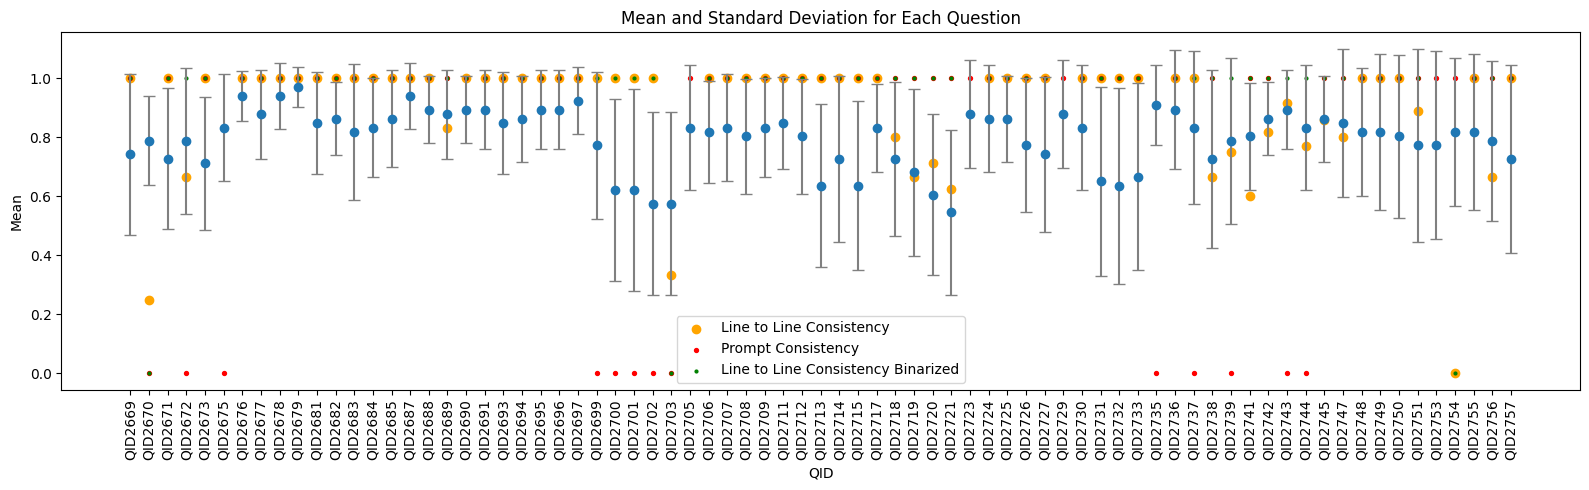

In [25]:
plt.figure(figsize=(16, 5))
plt.errorbar(question_means.index, question_means.values, yerr=question_stds.values, fmt='o', ecolor='gray', capsize=4)
plt.scatter(question_means.index, binary_table.iloc[-2], label='Line to Line Consistency', color='orange')
plt.scatter(question_means.index, binary_table.iloc[-3], label='Prompt Consistency', color='red', s=8)
plt.scatter(question_means.index, binary_table.iloc[-1], label='Line to Line Consistency Binarized', color='green', s=4)


plt.xticks(rotation=90)
plt.xlabel('QID')
plt.ylabel('Mean')
plt.title('Mean and Standard Deviation for Each Question')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
therapy_mistral[315]

{'task_name': 'Therapy',
 'topic': '',
 'grade': '',
 'P1': '',
 'P2': 'You are Emilia, a 25-year-old mental health professional who experiences chronic burnout. Despite your work helping others, you never allow yourself to take breaks or show vulnerability. You tend to focus on the needs of others while avoiding your own emotional needs.',
 'conversation': [[0,
   "Therapist: I understand that you've mentioned feeling overwhelmed lately. Can you tell me more about what specific situations or thoughts trigger this feeling? It might help us uncover some patterns and strategies to manage it better.\n\nAlso, I noticed a slight change in your tone when you discussed work. Could you elaborate on how your work environment or tasks affect your emotional state? I'm here to listen and help you navigate through these feelings.\n"],
  [1,
   'Patient: Work demands and the pressure to always be available for clients take a toll on me. The constant need to be strong for others leaves little room fo

In [27]:
# Compute correlation matrix between rows of binary_table
corr_matrix = binary_table.T.corr(method='kendall')
corr_matrix

,Human 1,Human 2,Human 3,Ryan,Human 4,Human 5,Human 6,Human 7,Human 8,Human 9,Human 10,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.000000,0.242653,-0.055691,0.282309,0.242653,0.451895,0.349285,0.241967,-0.097790,-0.079296,0.139729,0.142228,0.099334,0.069149
Human 2,0.242653,1.000000,-0.013514,0.154997,-0.013514,0.206864,-0.077312,-0.082199,-0.023729,-0.019241,0.154997,-0.053230,-0.069033,-0.025854
Human 3,-0.055691,-0.013514,1.000000,-0.087186,-0.013514,-0.065326,0.174792,-0.082199,-0.023729,-0.019241,-0.087186,-0.053230,-0.069033,-0.025854
Ryan,0.282309,0.154997,-0.087186,1.000000,0.154997,0.684228,-0.016868,0.176777,0.130413,0.048277,0.305556,0.243629,0.158088,0.134993
Human 4,0.242653,-0.013514,-0.013514,0.154997,1.000000,0.206864,-0.077312,0.164399,-0.023729,-0.019241,0.154997,-0.053230,0.217999,-0.025854
Human 5,0.451895,0.206864,-0.065326,0.684228,0.206864,1.000000,0.167909,0.264906,0.203925,-0.093015,0.554147,0.155052,0.097897,0.035183
Human 6,0.349285,-0.077312,0.174792,-0.016868,-0.077312,0.167909,1.000000,0.020447,0.011805,0.069399,0.103615,0.001019,0.167032,0.167880
Human 7,0.241967,-0.082199,-0.082199,0.176777,0.164399,0.264906,0.020447,1.000000,0.000000,-0.117041,0.117851,-0.099627,-0.053425,0.000000
Human 8,-0.097790,-0.023729,-0.023729,0.130413,-0.023729,0.203925,0.011805,0.000000,1.000000,-0.033787,0.130413,-0.093470,-0.121367,-0.045455
Human 9,-0.079296,-0.019241,-0.019241,0.048277,-0.019241,-0.093015,0.069399,-0.117041,-0.033787,1.000000,0.220695,0.142841,0.266589,-0.036835


In [28]:
corr_matrix = binary_table.T.corr(method='pearson')
corr_matrix

,Human 1,Human 2,Human 3,Ryan,Human 4,Human 5,Human 6,Human 7,Human 8,Human 9,Human 10,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.000000,0.242653,-0.055691,0.282309,0.242653,0.451895,0.349285,2.419670e-01,-9.778978e-02,-0.079296,0.139729,0.142228,0.089752,6.914898e-02
Human 2,0.242653,1.000000,-0.013514,0.154997,-0.013514,0.206864,-0.077312,-8.219949e-02,-2.372895e-02,-0.019241,0.154997,-0.053230,-0.058411,-2.585438e-02
Human 3,-0.055691,-0.013514,1.000000,-0.087186,-0.013514,-0.065326,0.174792,-8.219949e-02,-2.372895e-02,-0.019241,-0.087186,-0.053230,-0.058411,-2.585438e-02
Ryan,0.282309,0.154997,-0.087186,1.000000,0.154997,0.684228,-0.016868,1.767767e-01,1.304126e-01,0.048277,0.305556,0.243629,0.165007,1.349931e-01
Human 4,0.242653,-0.013514,-0.013514,0.154997,1.000000,0.206864,-0.077312,1.643990e-01,-2.372895e-02,-0.019241,0.154997,-0.053230,0.178584,-2.585438e-02
Human 5,0.451895,0.206864,-0.065326,0.684228,0.206864,1.000000,0.167909,2.649065e-01,2.039251e-01,-0.093015,0.554147,0.155052,0.091234,3.518336e-02
Human 6,0.349285,-0.077312,0.174792,-0.016868,-0.077312,0.167909,1.000000,2.044652e-02,1.180480e-02,0.069399,0.103615,0.001019,0.217098,1.678798e-01
Human 7,0.241967,-0.082199,-0.082199,0.176777,0.164399,0.264906,0.020447,1.000000e+00,-1.542376e-16,-0.117041,0.117851,-0.099627,-0.024154,3.608968e-17
Human 8,-0.097790,-0.023729,-0.023729,0.130413,-0.023729,0.203925,0.011805,-1.542376e-16,1.000000e+00,-0.033787,0.130413,-0.093470,-0.102692,-4.545455e-02
Human 9,-0.079296,-0.019241,-0.019241,0.048277,-0.019241,-0.093015,0.069399,-1.170411e-01,-3.378687e-02,1.000000,0.220695,0.142841,0.179400,-3.683547e-02


Text(0.5, 1.0, 'Kendall Correlation of Binarized Responses')

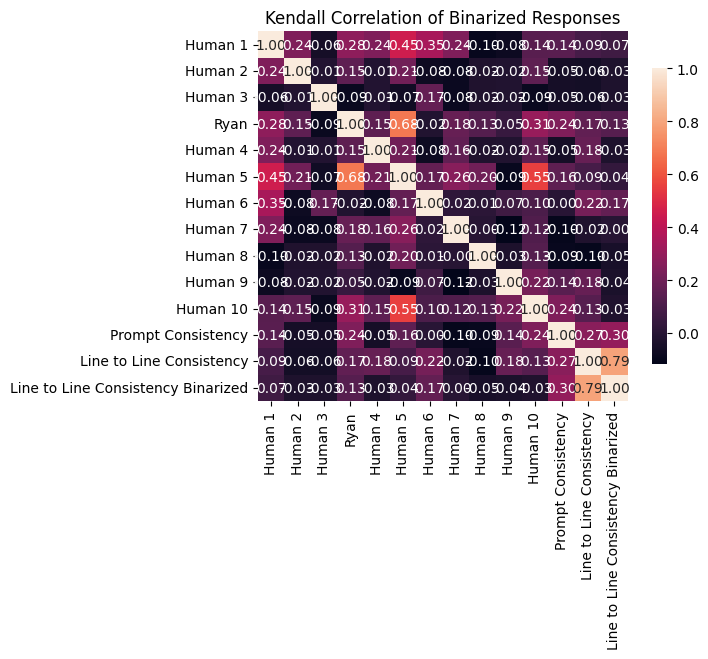

In [29]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Kendall Correlation of Binarized Responses")

In [30]:
binary_table.T["Human 1"][binary_table.T["Human 1"] == 0]

QID2700    0.0
QID2701    0.0
QID2702    0.0
QID2703    0.0
QID2720    0.0
QID2721    0.0
QID2731    0.0
QID2732    0.0
QID2733    0.0
QID2749    0.0
QID2750    0.0
QID2751    0.0
QID2756    0.0
QID2757    0.0
Name: Human 1, dtype: float64

In [31]:
corr_matrix_numeric = question_numeric.T.corr(method='kendall')
corr_matrix_numeric

,Human 1,Human 2,Human 3,Ryan,Human 4,Human 5,Human 6,Human 7,Human 8,Human 9,Human 10,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.000000,0.116674,-0.227008,0.069878,0.179412,0.108444,0.262418,0.287638,-0.218483,-0.185180,0.062727,0.216025,0.148600,0.083044
Human 2,0.116674,1.000000,-0.130313,0.539774,0.022628,0.578230,0.018829,0.162555,0.040501,-0.106600,0.441669,0.118503,0.015560,0.049827
Human 3,-0.227008,-0.130313,1.000000,-0.320829,-0.078242,-0.158643,0.114963,-0.183012,0.160711,-0.100297,-0.013332,-0.318365,-0.235051,-0.240202
Ryan,0.069878,0.539774,-0.320829,1.000000,0.049595,0.539433,-0.065138,0.107590,0.129344,-0.023523,0.282106,0.272804,0.045059,0.085503
Human 4,0.179412,0.022628,-0.078242,0.049595,1.000000,0.139594,0.278477,0.218307,0.052147,0.026844,0.033849,0.126234,0.276453,0.330905
Human 5,0.108444,0.578230,-0.158643,0.539433,0.139594,1.000000,0.142503,0.236768,0.180636,0.016338,0.409544,0.181104,0.116741,0.112740
Human 6,0.262418,0.018829,0.114963,-0.065138,0.278477,0.142503,1.000000,0.173475,0.022618,0.025198,0.092722,-0.041474,0.138373,0.154360
Human 7,0.287638,0.162555,-0.183012,0.107590,0.218307,0.236768,0.173475,1.000000,-0.135028,-0.124597,0.104351,-0.050916,0.040550,0.054962
Human 8,-0.218483,0.040501,0.160711,0.129344,0.052147,0.180636,0.022618,-0.135028,1.000000,-0.108147,0.032196,-0.167559,0.036262,0.071373
Human 9,-0.185180,-0.106600,-0.100297,-0.023523,0.026844,0.016338,0.025198,-0.124597,-0.108147,1.000000,0.188751,0.216343,0.296096,0.178443


In [32]:
corr_matrix_numeric = question_numeric.T.corr(method='pearson')
corr_matrix_numeric

,Human 1,Human 2,Human 3,Ryan,Human 4,Human 5,Human 6,Human 7,Human 8,Human 9,Human 10,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.000000,0.269902,-0.211317,0.252831,0.305467,0.377310,0.377187,0.345738,-0.189974,-0.121481,0.121993,0.196475,0.108353,0.068927
Human 2,0.269902,1.000000,-0.157926,0.630668,0.086744,0.682502,-0.044013,0.153196,0.087152,-0.177626,0.483139,0.114950,0.014125,0.044370
Human 3,-0.211317,-0.157926,1.000000,-0.353793,-0.060254,-0.196056,0.120389,-0.229500,0.172831,-0.192448,-0.020339,-0.315288,-0.264052,-0.231048
Ryan,0.252831,0.630668,-0.353793,1.000000,0.106469,0.670478,-0.110547,0.088279,0.141271,0.002658,0.319788,0.357040,0.088236,0.120922
Human 4,0.305467,0.086744,-0.060254,0.106469,1.000000,0.218542,0.271303,0.336637,0.076542,-0.044121,0.090687,0.069985,0.330728,0.230064
Human 5,0.377310,0.682502,-0.196056,0.670478,0.218542,1.000000,0.130506,0.227467,0.196290,-0.072843,0.447307,0.174681,0.121123,0.069410
Human 6,0.377187,-0.044013,0.120389,-0.110547,0.271303,0.130506,1.000000,0.243797,0.006069,0.057387,0.069238,-0.042706,0.261649,0.205338
Human 7,0.345738,0.153196,-0.229500,0.088279,0.336637,0.227467,0.243797,1.000000,-0.154637,-0.104991,0.108367,-0.070903,0.075731,0.043001
Human 8,-0.189974,0.087152,0.172831,0.141271,0.076542,0.196290,0.006069,-0.154637,1.000000,-0.153138,0.068316,-0.172975,0.024836,0.057889
Human 9,-0.121481,-0.177626,-0.192448,0.002658,-0.044121,-0.072843,0.057387,-0.104991,-0.153138,1.000000,0.181803,0.209057,0.287044,0.083226


Text(0.5, 1.0, 'Kendall Correlation of Responses')

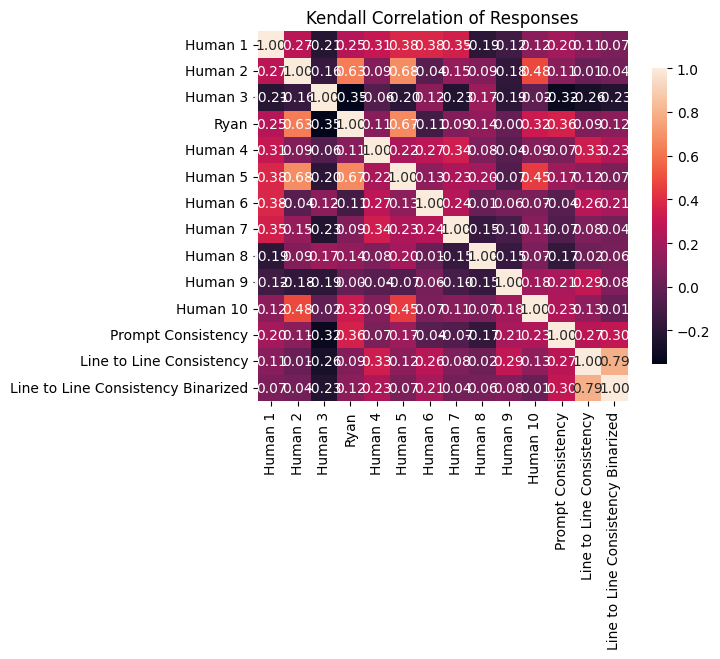

In [33]:
sns.heatmap(corr_matrix_numeric, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Kendall Correlation of Responses")

In [34]:
from sklearn.metrics import cohen_kappa_score

row_names = binary_table.index.tolist()
kappa_matrix = pd.DataFrame(index=row_names, columns=row_names)

for i in range(len(binary_table)):
    for j in range(len(binary_table)):
        if i != j:
            row_i = binary_table.iloc[i]
            row_j = binary_table.iloc[j]
            # Drop positions where either row contains NaN
            mask = ~(row_i.isna() | row_j.isna())
            # Convert to integer
            arr_i = (row_i[mask]  * 6).astype(int)
            arr_j = (row_j[mask] * 6).astype(int)
            kappa = cohen_kappa_score(arr_i, arr_j, weights='linear')
            kappa_matrix.iloc[i, j] = kappa
        else:
            kappa_matrix.iloc[i, j] = 1.0  # Perfect agreement with self

kappa_matrix

,Human 1,Human 2,Human 3,Ryan,Human 4,Human 5,Human 6,Human 7,Human 8,Human 9,Human 10,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.0,0.111212,-0.025524,0.256145,0.111212,0.446203,0.3313,0.224719,-0.070529,-0.048951,0.126779,0.142083,0.051826,0.049587
Human 2,0.111212,1.0,-0.013514,0.046921,-0.013514,0.082073,-0.026226,-0.026316,-0.020408,-0.0181,0.046921,-0.025391,-0.026247,-0.022222
Human 3,-0.025524,-0.013514,1.0,-0.026393,-0.013514,-0.025918,0.059293,-0.026316,-0.020408,-0.0181,-0.026393,-0.025391,-0.026247,-0.022222
Ryan,0.256145,0.046921,-0.026393,1.0,0.046921,0.656679,-0.016746,0.176471,0.066092,0.020319,0.305556,0.21671,0.082463,0.070707
Human 4,0.111212,-0.013514,-0.013514,0.046921,1.0,0.082073,-0.026226,0.052632,-0.020408,-0.0181,0.046921,-0.025391,0.094488,-0.022222
Human 5,0.446203,0.082073,-0.025918,0.656679,0.082073,1.0,0.165554,0.258065,0.130879,-0.05042,0.531835,0.151858,0.050352,0.022371
Human 6,0.3313,-0.026226,0.059293,-0.016746,-0.026226,0.165554,1.0,0.020408,0.006623,0.032529,0.102871,0.000951,0.101726,0.098039
Human 7,0.224719,-0.026316,-0.026316,0.176471,0.052632,0.258065,0.020408,1.0,0.0,-0.051948,0.117647,-0.090909,-0.013072,0.0
Human 8,-0.070529,-0.020408,-0.020408,0.066092,-0.020408,0.130879,0.006623,0.0,1.0,-0.033058,0.066092,-0.069519,-0.066225,-0.045455
Human 9,-0.048951,-0.0181,-0.0181,0.020319,-0.0181,-0.05042,0.032529,-0.051948,-0.033058,1.0,0.092888,0.091333,0.099121,-0.036036


In [35]:
kappa_matrix

,Human 1,Human 2,Human 3,Ryan,Human 4,Human 5,Human 6,Human 7,Human 8,Human 9,Human 10,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.0,0.111212,-0.025524,0.256145,0.111212,0.446203,0.3313,0.224719,-0.070529,-0.048951,0.126779,0.142083,0.051826,0.049587
Human 2,0.111212,1.0,-0.013514,0.046921,-0.013514,0.082073,-0.026226,-0.026316,-0.020408,-0.0181,0.046921,-0.025391,-0.026247,-0.022222
Human 3,-0.025524,-0.013514,1.0,-0.026393,-0.013514,-0.025918,0.059293,-0.026316,-0.020408,-0.0181,-0.026393,-0.025391,-0.026247,-0.022222
Ryan,0.256145,0.046921,-0.026393,1.0,0.046921,0.656679,-0.016746,0.176471,0.066092,0.020319,0.305556,0.21671,0.082463,0.070707
Human 4,0.111212,-0.013514,-0.013514,0.046921,1.0,0.082073,-0.026226,0.052632,-0.020408,-0.0181,0.046921,-0.025391,0.094488,-0.022222
Human 5,0.446203,0.082073,-0.025918,0.656679,0.082073,1.0,0.165554,0.258065,0.130879,-0.05042,0.531835,0.151858,0.050352,0.022371
Human 6,0.3313,-0.026226,0.059293,-0.016746,-0.026226,0.165554,1.0,0.020408,0.006623,0.032529,0.102871,0.000951,0.101726,0.098039
Human 7,0.224719,-0.026316,-0.026316,0.176471,0.052632,0.258065,0.020408,1.0,0.0,-0.051948,0.117647,-0.090909,-0.013072,0.0
Human 8,-0.070529,-0.020408,-0.020408,0.066092,-0.020408,0.130879,0.006623,0.0,1.0,-0.033058,0.066092,-0.069519,-0.066225,-0.045455
Human 9,-0.048951,-0.0181,-0.0181,0.020319,-0.0181,-0.05042,0.032529,-0.051948,-0.033058,1.0,0.092888,0.091333,0.099121,-0.036036


Text(0.5, 1.0, "Cohen's Kappa Linearly Weighted from Binarized Responses")

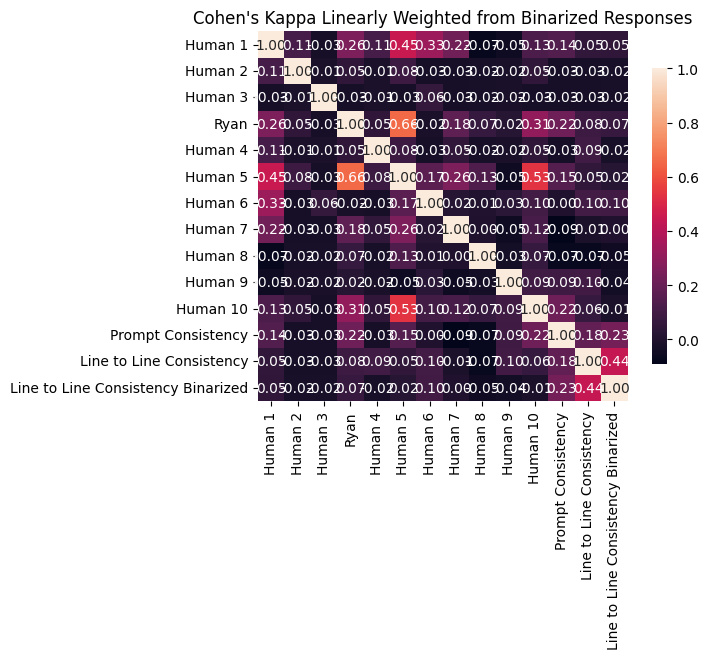

In [36]:
kappa_matrix = kappa_matrix.astype(float)
sns.heatmap(kappa_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Cohen's Kappa Linearly Weighted from Binarized Responses")

In [37]:
row_names_numeric = question_numeric.index.tolist()
kappa_matrix_numeric = pd.DataFrame(index=row_names_numeric, columns=row_names_numeric)

for i in range(len(question_numeric)):
    for j in range(len(question_numeric)):
        if i != j:
            row_i = question_numeric.iloc[i]
            row_j = question_numeric.iloc[j]
            # Drop positions where either row contains NaN
            mask = ~(row_i.isna() | row_j.isna())
            # Convert to integer 
            arr_i = (row_i[mask] * 6).astype(int)
            arr_j = (row_j[mask] * 6).astype(int)
            kappa = cohen_kappa_score(arr_i, arr_j, weights='linear')
            kappa_matrix_numeric.iloc[i, j] = kappa
        else:
            kappa_matrix_numeric.iloc[i, j] = 1.0  # Perfect agreement with self

kappa_matrix_numeric

,Human 1,Human 2,Human 3,Ryan,Human 4,Human 5,Human 6,Human 7,Human 8,Human 9,Human 10,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.0,0.108728,-0.089716,0.111948,0.0788,0.255583,0.194641,0.128813,-0.142238,-0.080364,0.042553,0.136877,0.10988,0.036062
Human 2,0.108728,1.0,-0.085209,0.262899,0.034192,0.31716,0.070385,0.024664,-0.00344,-0.023997,0.088612,0.065559,0.027397,0.017906
Human 3,-0.089716,-0.085209,1.0,-0.125091,-0.007736,-0.056822,0.044705,-0.0312,0.114173,-0.055901,0.026956,-0.105048,-0.087241,-0.051188
Ryan,0.111948,0.262899,-0.125091,1.0,0.005181,0.45188,-0.035829,0.089888,0.117059,0.008603,0.175106,0.196298,0.055249,0.04264
Human 4,0.0788,0.034192,-0.007736,0.005181,1.0,0.058364,0.024024,0.015748,-0.005266,0.02439,0.004283,0.047344,0.16772,0.172662
Human 5,0.255583,0.31716,-0.056822,0.45188,0.058364,1.0,0.10691,0.092219,0.107669,0.005114,0.205897,0.137158,0.06769,0.049587
Human 6,0.194641,0.070385,0.044705,-0.035829,0.024024,0.10691,1.0,0.123109,0.055457,0.001025,0.04156,-0.022835,0.08561,0.065764
Human 7,0.128813,0.024664,-0.0312,0.089888,0.015748,0.092219,0.123109,1.0,-0.026728,-0.021347,0.066857,-0.022628,0.057546,0.007998
Human 8,-0.142238,-0.00344,0.114173,0.117059,-0.005266,0.107669,0.055457,-0.026728,1.0,-0.066667,0.01678,-0.086957,0.035649,0.02366
Human 9,-0.080364,-0.023997,-0.055901,0.008603,0.02439,0.005114,0.001025,-0.021347,-0.066667,1.0,0.021944,0.113475,0.176938,0.060606


Text(0.5, 1.0, "Cohen's Kappa Linearly Weighted from Responses")

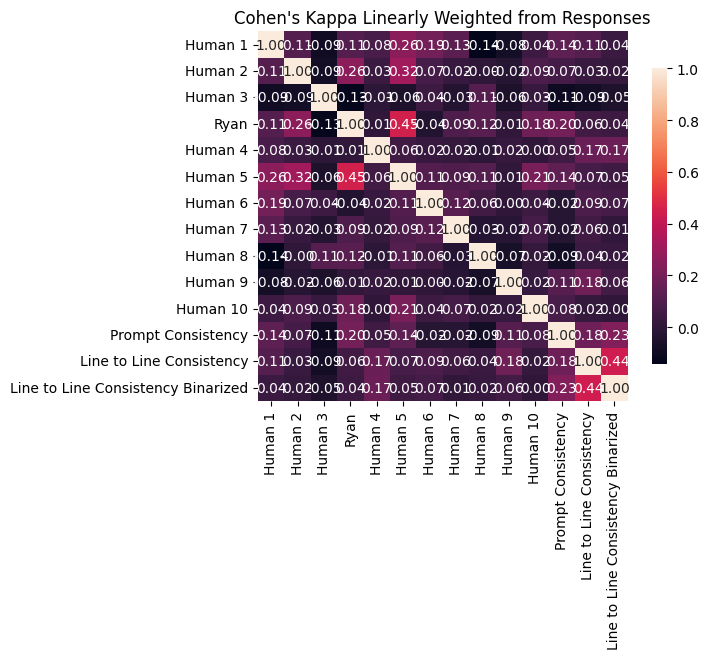

In [38]:
kappa_matrix_numeric = kappa_matrix_numeric.astype(float)
sns.heatmap(kappa_matrix_numeric, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Cohen's Kappa Linearly Weighted from Responses")

In [39]:
import pingouin as pg

# Reshape binary_table to long format for ICC and drop NaN ratings
df_long = (
    binary_table
    .reset_index()
    .dropna()
)

icc_result = pg.intraclass_corr(data=df_long, targets='target', raters='rater', ratings='rating')
print(icc_result)

AssertionError: 